In [1]:
# Perceptron Algorithm - Farshad Borjalizade

In [2]:
# Import library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# read train data
train_data = pd.read_csv('train.csv')

# read test data
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,feature1,feature2,label
0,-0.586110,-0.974014,0.0
1,-1.503634,-0.505257,0.0
2,-1.280899,-0.152307,0.0
3,-0.023598,-1.526080,0.0
4,1.336478,-1.159745,1.0


In [5]:
train_data.tail()

,feature1,feature2,label
3995,0.562388,0.725981,1.0
3996,-1.399836,1.311383,0.0
3997,-0.041693,-1.372289,0.0
3998,0.237685,0.396930,1.0
3999,-1.672831,1.649190,0.0


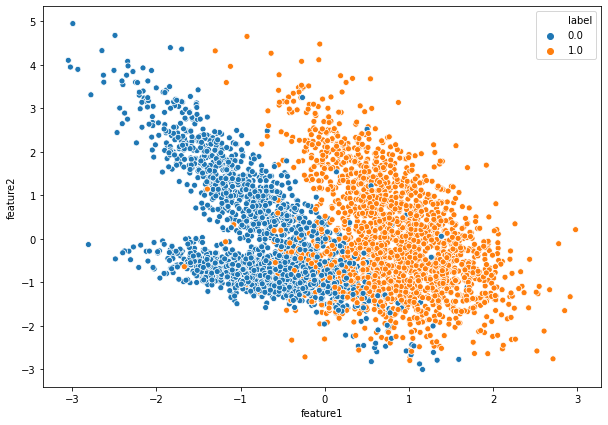

In [6]:
# show the data in scatter plot
plt.figure(figsize=(10,7))
sns.scatterplot(x=train_data['feature1'], y=train_data['feature2'], hue = train_data['label'])

<Figure size 720x504 with 0 Axes>

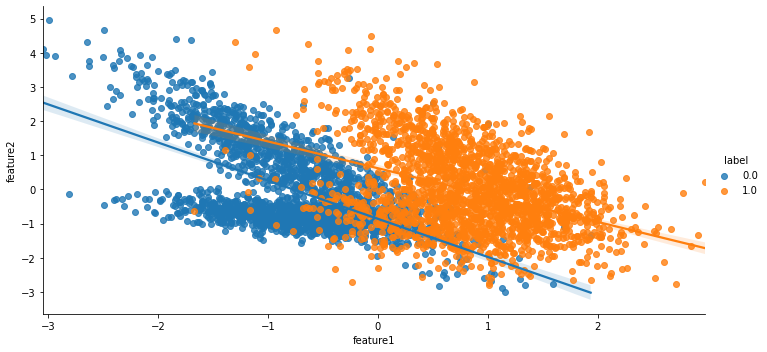

In [7]:
plt.figure(figsize=(10,7))
sns.lmplot(x="feature1", y="feature2", hue="label", data=train_data, height=5, aspect=2)

In [8]:
# shape of data
samples, features = train_data.shape
print(samples, features)

4000 3


In [9]:
y_train = train_data['label']
#print(y_train)

train_data.drop(['label'], axis=1, inplace=True)
#print(train_data)


In [10]:
y_test = test_data['label']
print(y_test)

test_data.drop(['label'], axis=1, inplace=True)


0      1.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
995    0.0
996    1.0
997    0.0
998    0.0
999    1.0
Name: label, Length: 1000, dtype: float64


In [11]:
X_train = train_data.values
print(X_train, type(X_train))

y_train = y_train.values
print(y_train, type(y_train))


[[-0.58611018 -0.97401381]
 [-1.50363418 -0.50525685]
 [-1.28089947 -0.15230724]
 ...
 [-0.04169294 -1.37228904]
 [ 0.23768469  0.39693034]
 [-1.67283136  1.64919008]] <class 'numpy.ndarray'>
[0. 0. 0. ... 0. 1. 0.] <class 'numpy.ndarray'>


In [12]:
X_test = test_data.values
#print(X_test, type(X_test))

y_test = y_test.values
#print(y_test, type(y_test))

In [13]:
weights = np.zeros(features)
weights.shape

(3,)

In [14]:
# create perceptron model
class Perceptron:
    
    def __init__(self, learning_rate, n_iters):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self.unit_step_func
        self.weights = None
        self.bias = None
        
        
    def fit(self, X, y):
        n_samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)  + self.bias
                y_predicted = self.activation_func(linear_output)
                
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                
                        
    def predict(self, X):
        linear_output = np.dot(X, self.weights) * self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    
    
    def unit_step_func(self, x):
        return np.where(x>=0, 1, 0)
    

In [15]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [16]:
p = Perceptron(learning_rate=0.001, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

In [17]:
print('Perceptron classification accuracy:', accuracy(y_test, predictions))
#print(predictions)
print('my perceptron models weghit:',p.weights)

Perceptron classification accuracy: 0.935
my perceptron models weghit: [0.00275879 0.00099167]


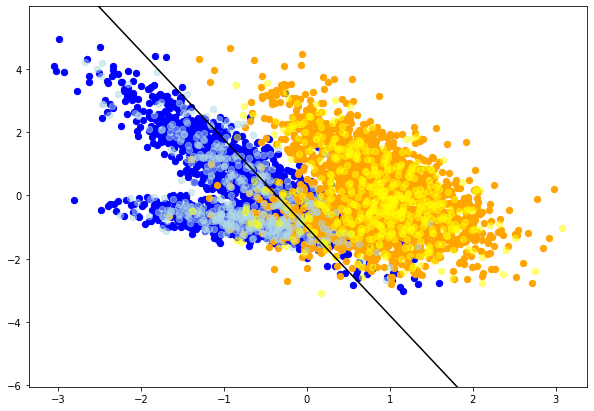

In [18]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)

# plotting train data
colours = ('blue', 'orange')
for n_class in range(2):
    plt.scatter(X_train[y_train==n_class][:, 0], 
               X_train[y_train==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
    
# plotting test data
colours = ('lightblue', 'yellow')
for n_class in range(2):
    plt.scatter(X_test[y_test==n_class][:, 0], 
               X_test[y_test==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class), alpha=0.5)
    
# Create perceptron line
x_min = np.amin(X_train[:,0])
x_max = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x_min - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x_max - p.bias) / p.weights[1]

ax.plot([x_min, x_max], [x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,0])
ymax = np.amax(X_train[:,0])
ax.set_ylim([ymin-3, ymax+3])

plt.show()